<a href="https://colab.research.google.com/github/9-coding/Mathematics/blob/main/adagrad_mse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

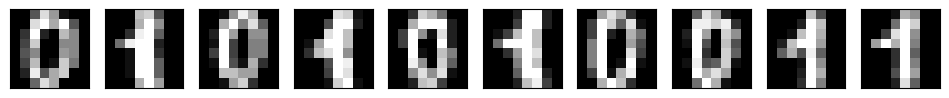

<ipython-input-16-cc4ccafb927a>:89: RuntimeWarning: divide by zero encountered in true_divide
  adaptive_learning_rate = np.where(grad_squared_sum > 0, learning_rate / np.sqrt(grad_squared_sum), learning_rate)


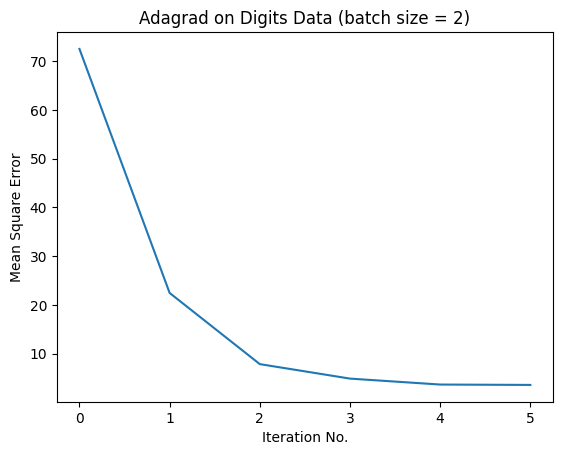

In [ ]:
# Reference: https://stackabuse.com/gradient-descent-in-python-implementation-and-theory/
# Code to determine how the mse graph depends on how much the batch size is in the stochastic gradient descent.

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split


#Gradient Descent for Minimizing Mean Square Error

# Input argument is weight and a tuple (train_data, target)
def grad_mse(w,xy):
    (x,y) = xy
    (rows,cols) = x.shape
    
    # Compute the output
    o = np.sum(x*w,axis=1)
    diff = y-o
    diff = diff.reshape((rows,1))    
    diff = np.tile(diff, (1, cols))
    grad = diff*x
    grad = -np.sum(grad,axis=0)
    return grad

# Input argument is weight and a tuple (train_data, target)
def mse(w,xy):
    (x,y) = xy
    
    # Compute output
    # keep in mind that wer're using mse and not mse/m
    # because it would be relevant to the end result
    o = np.sum(x*w,axis=1)
    mse = np.sum((y-o)*(y-o))
    mse = mse/2
    return mse    



# Running Gradient Descent on OCR

# Load the digits dataset with two classes
digits,target = dt.load_digits(n_class=2,return_X_y=True)
fig,ax = plt.subplots(nrows=1, ncols=10,figsize=(12,4),subplot_kw=dict(xticks=[], yticks=[]))

# Plot some images of digits
for i in np.arange(10):
    ax[i].imshow(digits[i,:].reshape(8,8),cmap=plt.cm.gray)   
plt.show()

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(
                        digits, target, test_size=0.2, random_state=10)

# Add a column of ones to account for bias in train and test
x_train = np.hstack((np.ones((y_train.size,1)),x_train))
x_test  = np.hstack((np.ones((y_test.size,1)),x_test))



def adagrad(max_epochs, threshold, w_init, obj_func, grad_func, xy, batch_size, learning_rate=0.05):
    (x_train, y_train) = xy
    w = w_init
    w_history = w
    f_history = obj_func(w, xy)
    grad_squared_sum = np.zeros_like(w)
    i = 0
    diff = 1.0e10
    rows = x_train.shape[0]

    while i < max_epochs and diff > threshold:
        np.random.seed(i)
        p = np.random.permutation(rows)
        mini_batches = [p[k:k + batch_size] for k in range(0, rows, batch_size)]

        for n in mini_batches:
            x_mini_batch = x_train[n]
            y_mini_batch = y_train[n]

            gradient = np.zeros(w.shape)

            for x, y in zip(x_mini_batch, y_mini_batch):
                gradient += grad_func(w, (np.array([x]), y))

            grad_squared_sum += gradient ** 2
            adaptive_learning_rate = np.where(grad_squared_sum > 0, learning_rate / np.sqrt(grad_squared_sum), learning_rate)
            w -= adaptive_learning_rate * gradient

        i += 1
        w_history = np.vstack((w_history, w))
        f_history = np.vstack((f_history, obj_func(w, xy)))
        diff = np.abs(f_history[-1] - f_history[-2])

    return w_history, f_history


rand = np.random.RandomState(19)
w_init = rand.uniform(-1, 1, x_train.shape[1]) * 0.000001
w_history_adagrad, mse_history_adagrad = adagrad(
    100, 0.1, w_init, mse, grad_mse, (x_train, y_train), 2, learning_rate=0.05
)

plt.plot(np.arange(mse_history_adagrad.size), mse_history_adagrad)
plt.xlabel('Iteration No.')
plt.ylabel('Mean Square Error')
plt.title('Adagrad')
plt.show()


In [2]:
!git commit --amend -m "add adagrad_mse"

fatal: not a git repository (or any of the parent directories): .git
